In [1]:
from stable_baselines3 import PPO, SAC, DDPG
from environments import QuadraticEnvND
import testing

/Users/I761836/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
model_ppo = PPO.load('ppo_quadratic_functionND')
model_ddpg = DDPG.load('ddpg_quadratic_functionND')
model_sac = SAC.load('sac_quadratic_functionND')

In [3]:
import data
testing_functions = data.generate_dataset(n = 10, function_type = 'quadratic_function_nd', n_dims = 3)
env = QuadraticEnvND(functions = testing_functions, n_dims = 3)

In [4]:
'''
model_sac.save('sac_quadratic_functionND')
model_ppo.save('ppo_quadratic_functionND')
model_ddpg.save('ddpg_quadratic_functionND')'
'''

"\nmodel_sac.save('sac_quadratic_functionND')\nmodel_ppo.save('ppo_quadratic_functionND')\nmodel_ddpg.save('ddpg_quadratic_functionND')'\n"

In [5]:
model_ppo.set_env(env=env)
model_sac.set_env(env=env)
model_ddpg.set_env(env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/I761836/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


/Users/I761836/Downloads/L2O/testing.py:89: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  return x.T @ A @ x + b.T @ x + c


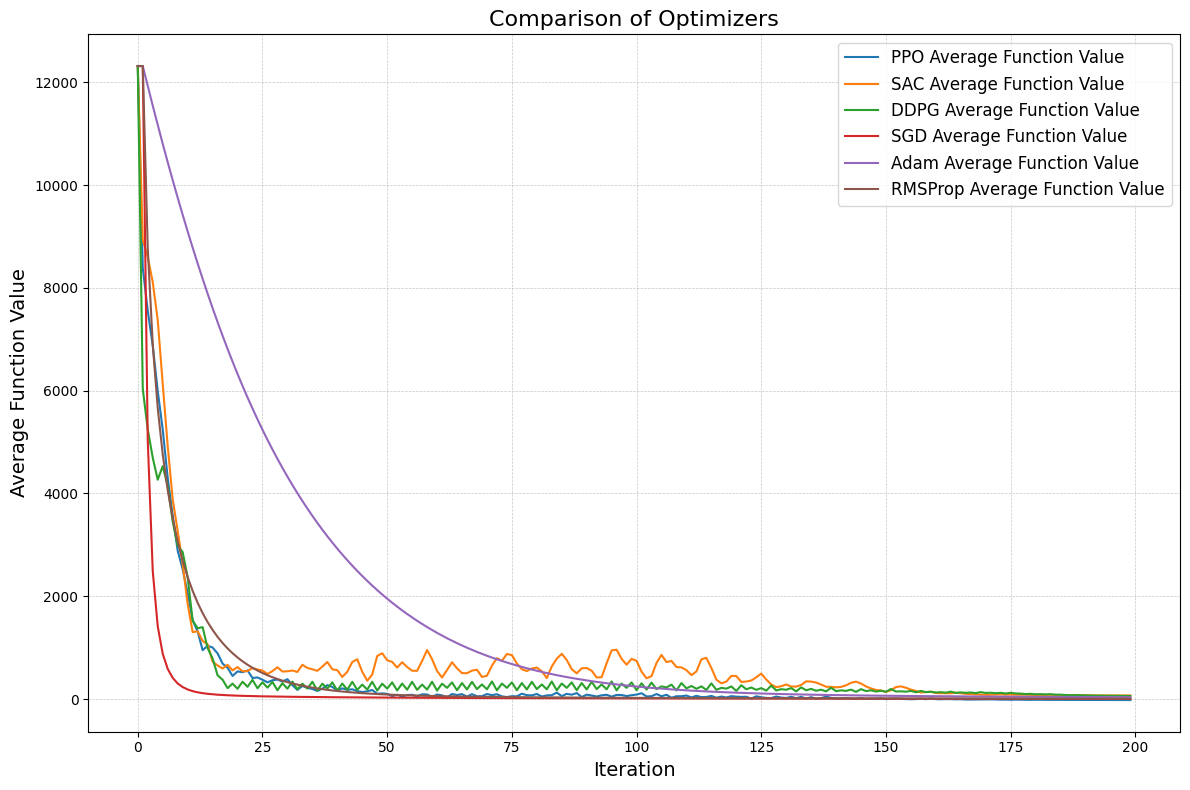

In [6]:
models = {
        'PPO': model_ppo,
        'SAC': model_sac,
        'DDPG': model_ddpg,
        'SGD': None,
        'Adam': None,
        'RMSProp': None
    }
max_iterations = 200
results = testing.run_optimizer_tests(env, testing_functions, models, max_iterations = 200, function_type = 'quadratic_function_nd', dim_param=3)
avg_values = testing.calculate_average_values(results)
testing.plot_results(avg_values, max_iterations)

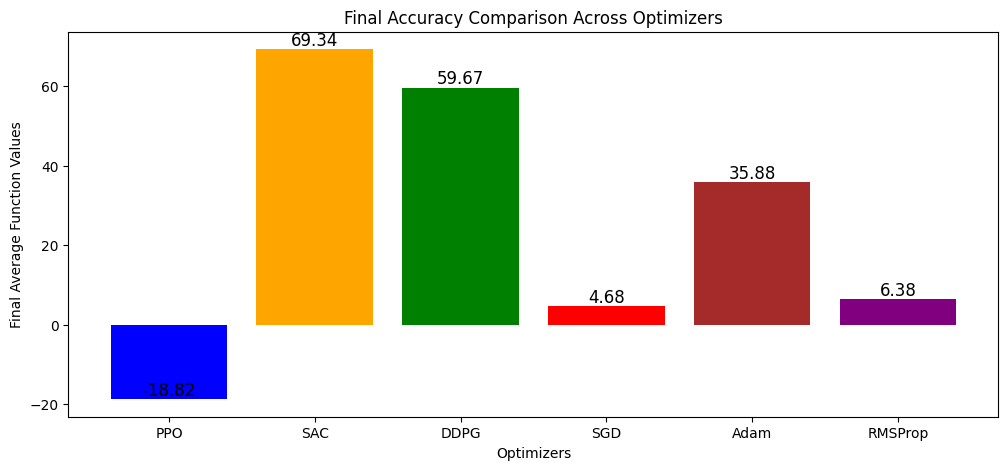

In [7]:
comparison = []
for model_name, data in avg_values.items():
    comparison.append((model_name, data.min()))
testing.plot_final_function_values(comparison)